In [9]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.metrics.intrinsic_dimension import IntrinsicDimension
from src.metrics.clustering import LabelClustering
from src.metrics.probe import LinearProbe
from src.utils.tensor_storage import retrieve_from_storage, preprocess_label
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plot_config = {
    #'font.size': 12,           
    'axes.titlesize': 30,      
    'axes.labelsize': 29,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 23,
    'figure.figsize': (10,8),
    'lines.linewidth': 2.5,
    'lines.markersize': 10,
}


# Data visulization
The following snippet can be used to replicate some of the plot from the paper

In [28]:
def average_custom_blocks(y, n):
    if n == 0:
        return y
    y_avg = []
    y_avg.append(np.mean(y[0:n]))
    if len(y) > n:
        y_avg.append(np.mean(y[0:n+1]))

    for i in range(1, len(y)-1):
        y_avg.append(np.mean(y[i:n+i+1]))
    assert len(y_avg) == len(y), f"y_avg:{len(y_avg)}, y:{len(y)}"

    return np.array(y_avg)

def plotter(file_title, data, title, ylabel, yticks = None, avg = 0):
    # Set the style
    sns.set_style(
        "whitegrid",
        rc={"axes.edgecolor": ".15", "xtick.bottom": True, "ytick.left": True},
    )
    # Setup figure and axes for 2 plots in one row
    plt.figure(dpi = 200)
    layers = np.arange(0,data[0].shape[0])

    #Set ticks
    if layers.shape[0] < 50:
        tick_positions = np.arange(0, layers.shape[0], 4)  # Generates positions 0, 4, 8, ...
    else:
        tick_positions = np.arange(0, layers.shape[0], 8)  # Generates positions 0, 4, 8, ...

    tick_labels = tick_positions +1 # Get the corresponding labels from x

    
    names = ["0 shot pt", 
            "1 shot pt", 
            "2 shot pt",
            "5 shot pt",
            "0 shot ft"]
    markerstyle = ['o', 'o', 'o', 'o', 'x']
    
    for int_dim, label, markerstyle in zip(data, names, markerstyle):
        int_dim = average_custom_blocks(int_dim, avg)
        sns.scatterplot(x=layers, y=int_dim, marker= markerstyle)
        sns.lineplot(x=layers, y=int_dim, label=label)


    plt.xlabel("Layer")
    plt.ylabel(ylabel)
    if title:
        plt.title(title)
    if yticks:
        plt.xticks(ticks=tick_positions, labels=tick_labels)
        tick_positions_y = np.arange(0, yticks, yticks/10).round(2)
        plt.yticks(tick_positions_y)
    plt.tick_params(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.rcParams.update(plot_config)
    if title:
        plt.savefig(f"plots/{file_title}.png")
        plt.savefig(f"plots/{file_title}.pdf", format='pdf')
    else:
        plt.savefig(f"plots/no_title/{file_title}.png")
        plt.savefig(f"plots/no_title/{file_title}.pdf", format='pdf')
    plt.show()

## Intrinsic Dimension

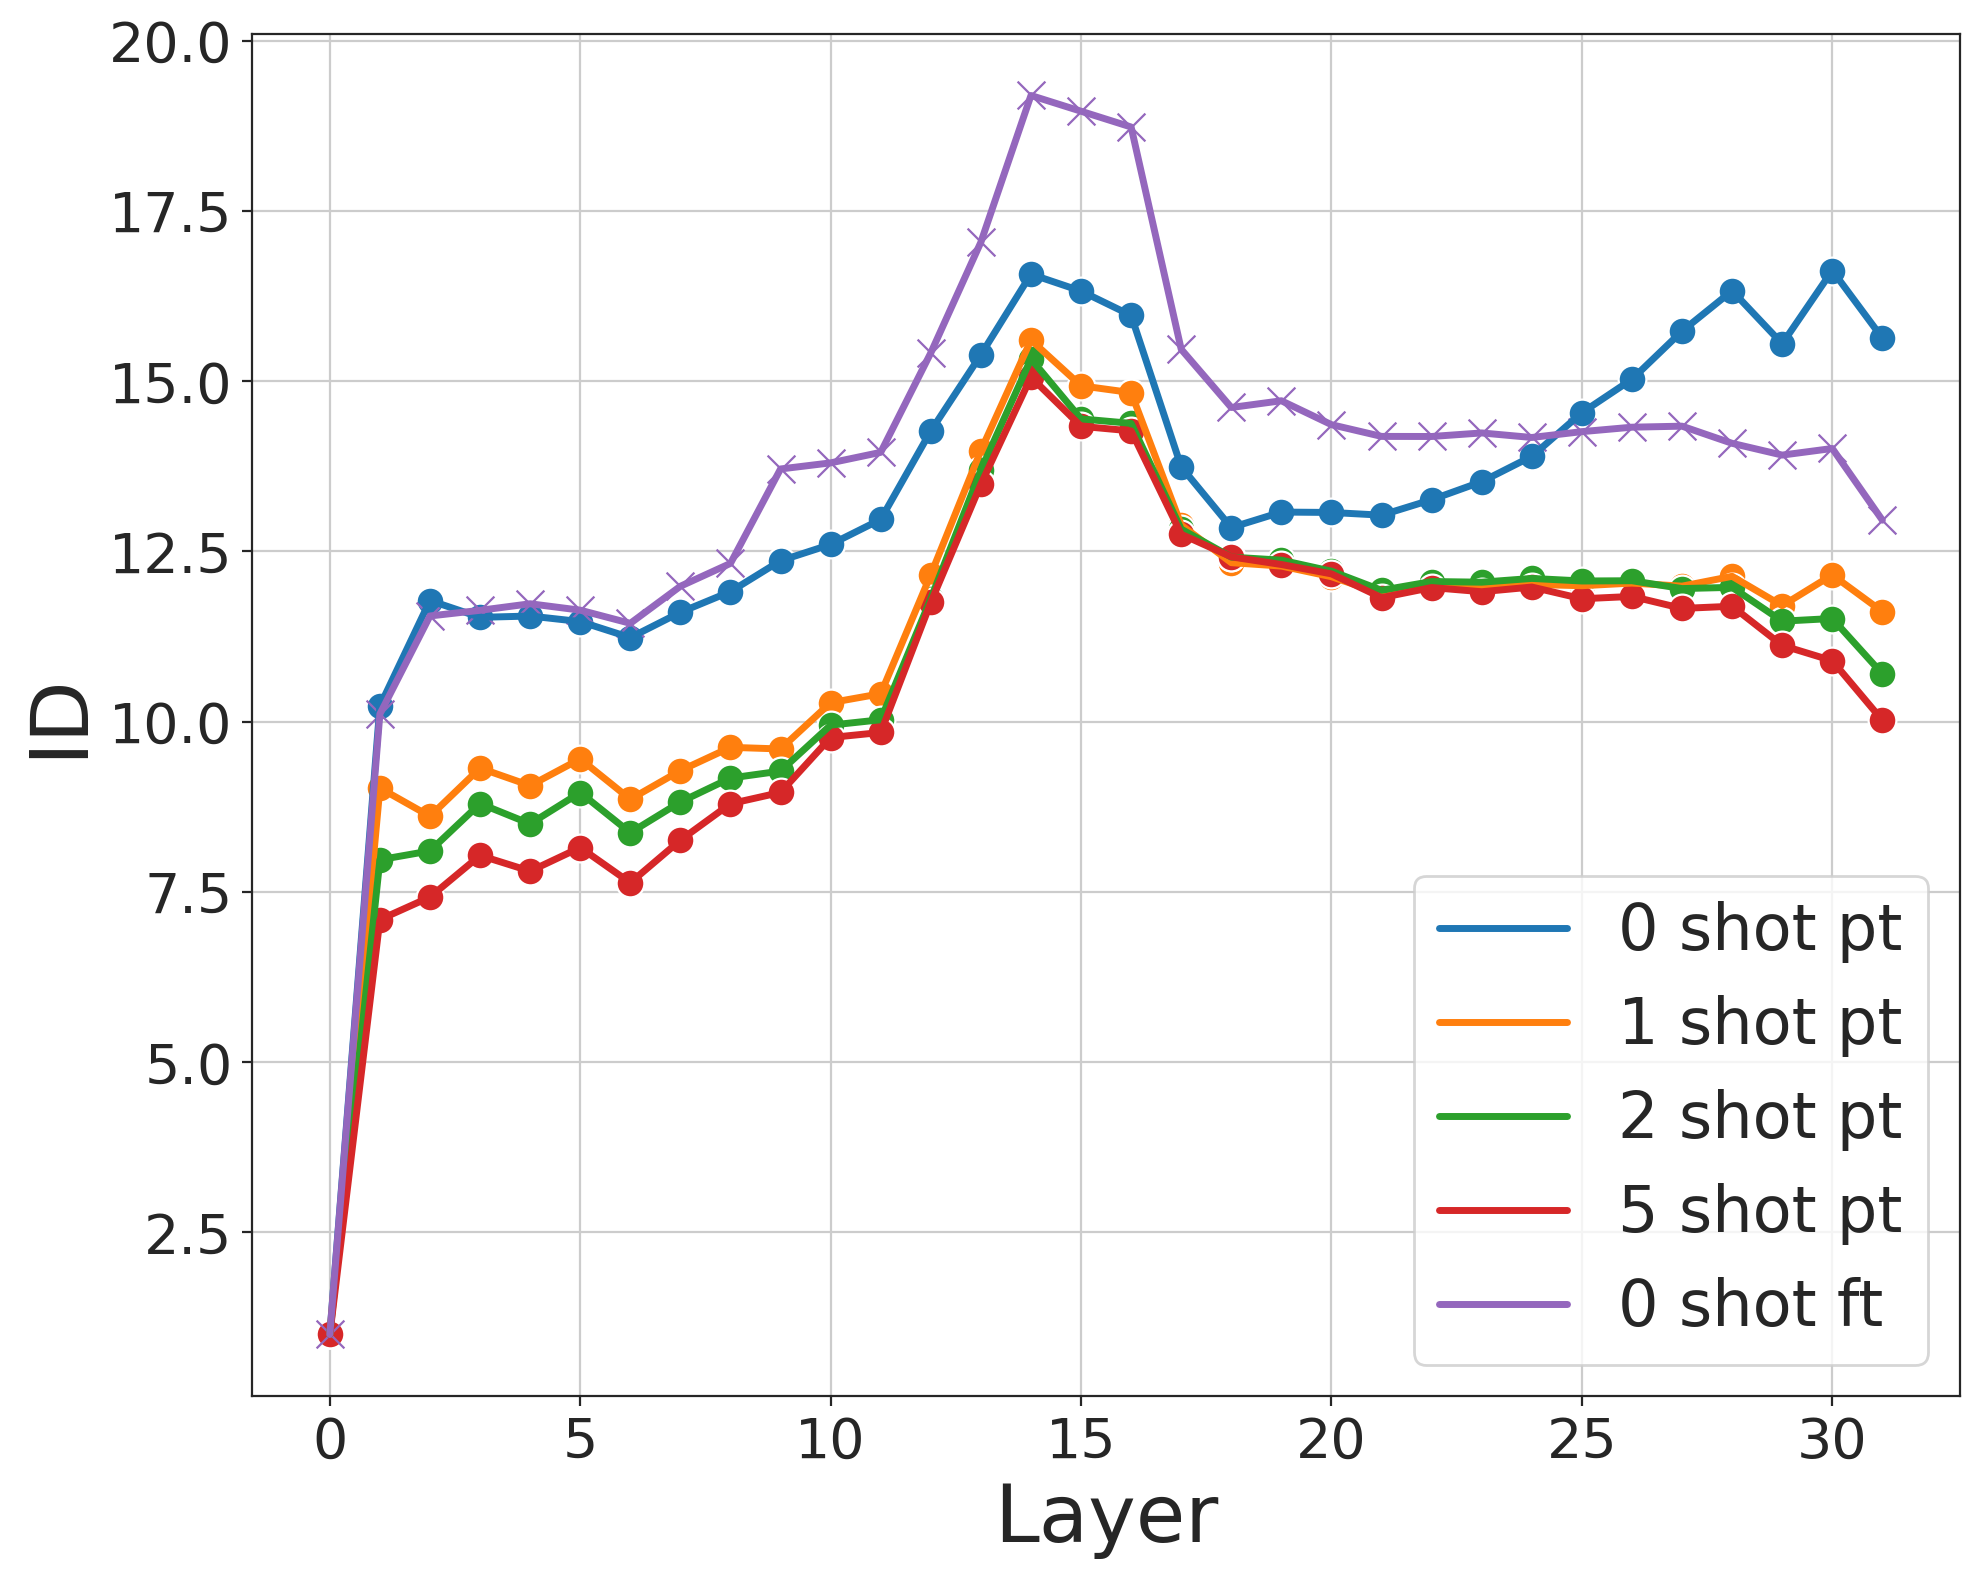

In [29]:
# _PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
#              "/representation_landscape_fs_ft/results/mmlu_pro_race/"
#              "evaluated_test/llama-3-8b")

# shot = [0,1,2,5]
# data = []
# for i in shot:
#     out_from_storage = retrieve_from_storage(_PATH / f'{i}shot',
#                                         full_tensor=True)
#     tensors, _, number_of_layers = out_from_storage
#     intrinsic_dim = IntrinsicDimension()
#     data.append(intrinsic_dim.main(tensors, number_of_layers))

# _PATH_ft = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
#                 "/representation_landscape_fs_ft/results/mmlu_pro_race"
#                 "/finetuned_dev_val_balanced_20samples/evaluated_test"
#                 "/llama-3-8b/2epochs/epoch_2")

# intrinsic_dim = IntrinsicDimension()
# out_from_storage = retrieve_from_storage(_PATH_ft,
#                                         full_tensor=True)
# tensors, _, number_of_layers = out_from_storage
# data.append(intrinsic_dim.main(tensors, number_of_layers))
# Selecting the order of nearest neighbors considered in gride
data_nn_index = [arr[:,-3] for arr in data]
plotter("intrinsic_dimension",data_nn_index, None, "ID", avg = 0)

## Clustering

In [12]:
from datasets import load_from_disk
dataset_path = "/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens/repo/diego/mmlu_pro_race/test/"
test = load_from_disk(dataset_path).to_pandas()

/u/dssc/zenocosini/helm_suite/representation_landscape_fs_ft/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Subjects

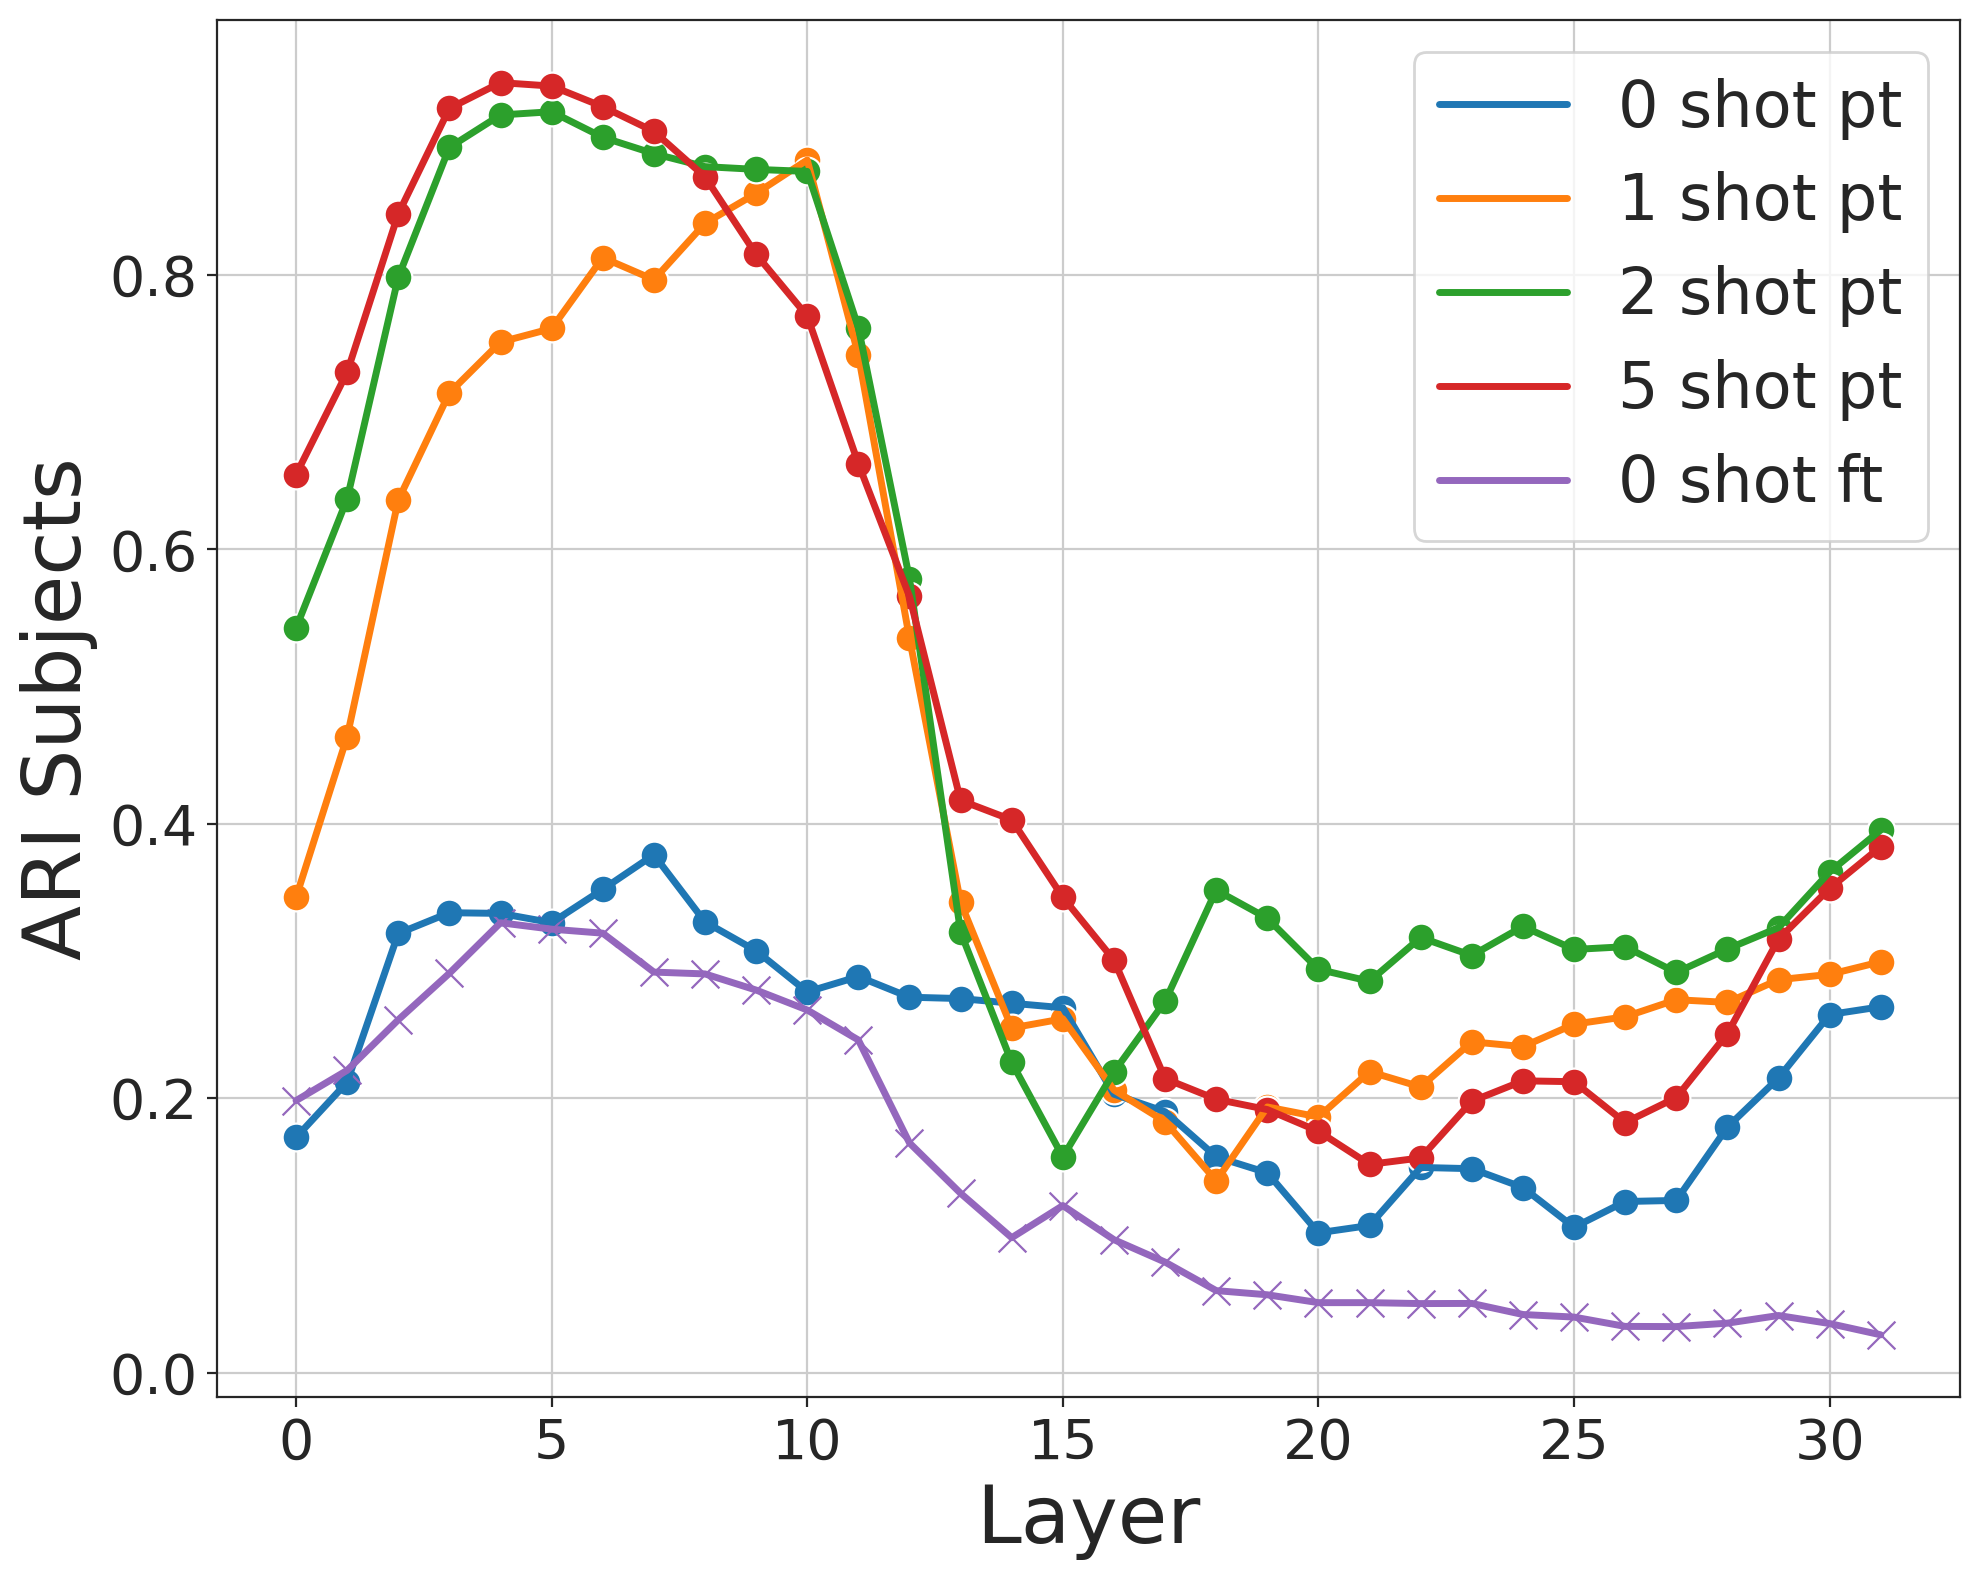

In [37]:
# _PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
#              "/representation_landscape_fs_ft/results/mmlu_pro_race/"
#              "evaluated_test/llama-3-8b")
# shot = [0,1,2,5]
# data_subjects = []
# for i in shot:
#     clustering = LabelClustering()
#     out_from_storage = retrieve_from_storage(_PATH / f'{i}shot', full_tensor=True, instances_per_sub=200)
#     tensors, labels, number_of_layers = out_from_storage
#     data_subjects.append(clustering.main(z=1.68,
#                                 tensors=tensors,
#                                 labels=labels["subjects"],
#                                 number_of_layers=number_of_layers))
# _PATH_ft = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
#                 "/representation_landscape_fs_ft/results/mmlu_pro_race"
#                 "/finetuned_dev_val_balanced_20samples/evaluated_test"
#                 "/llama-3-8b/2epochs/epoch_2")
# clustering = LabelClustering()
# out_from_storage = retrieve_from_storage(_PATH_ft , full_tensor=True, instances_per_sub=200)
# tensors, labels, number_of_layers = out_from_storage
# data_subjects.append(clustering.main(z=1.68,
#                             tensors=tensors,
#                             labels=labels["subjects"],
#                             number_of_layers=number_of_layers))

# ari = [np.array(i['adjusted_rand_score']) for i in data_subjects]
# plotter("subject", ari, "Llama 3 8b", "ARI", avg = 2)
plotter("subject", ari, None, "ARI Subjects", avg = 2)


### Letters

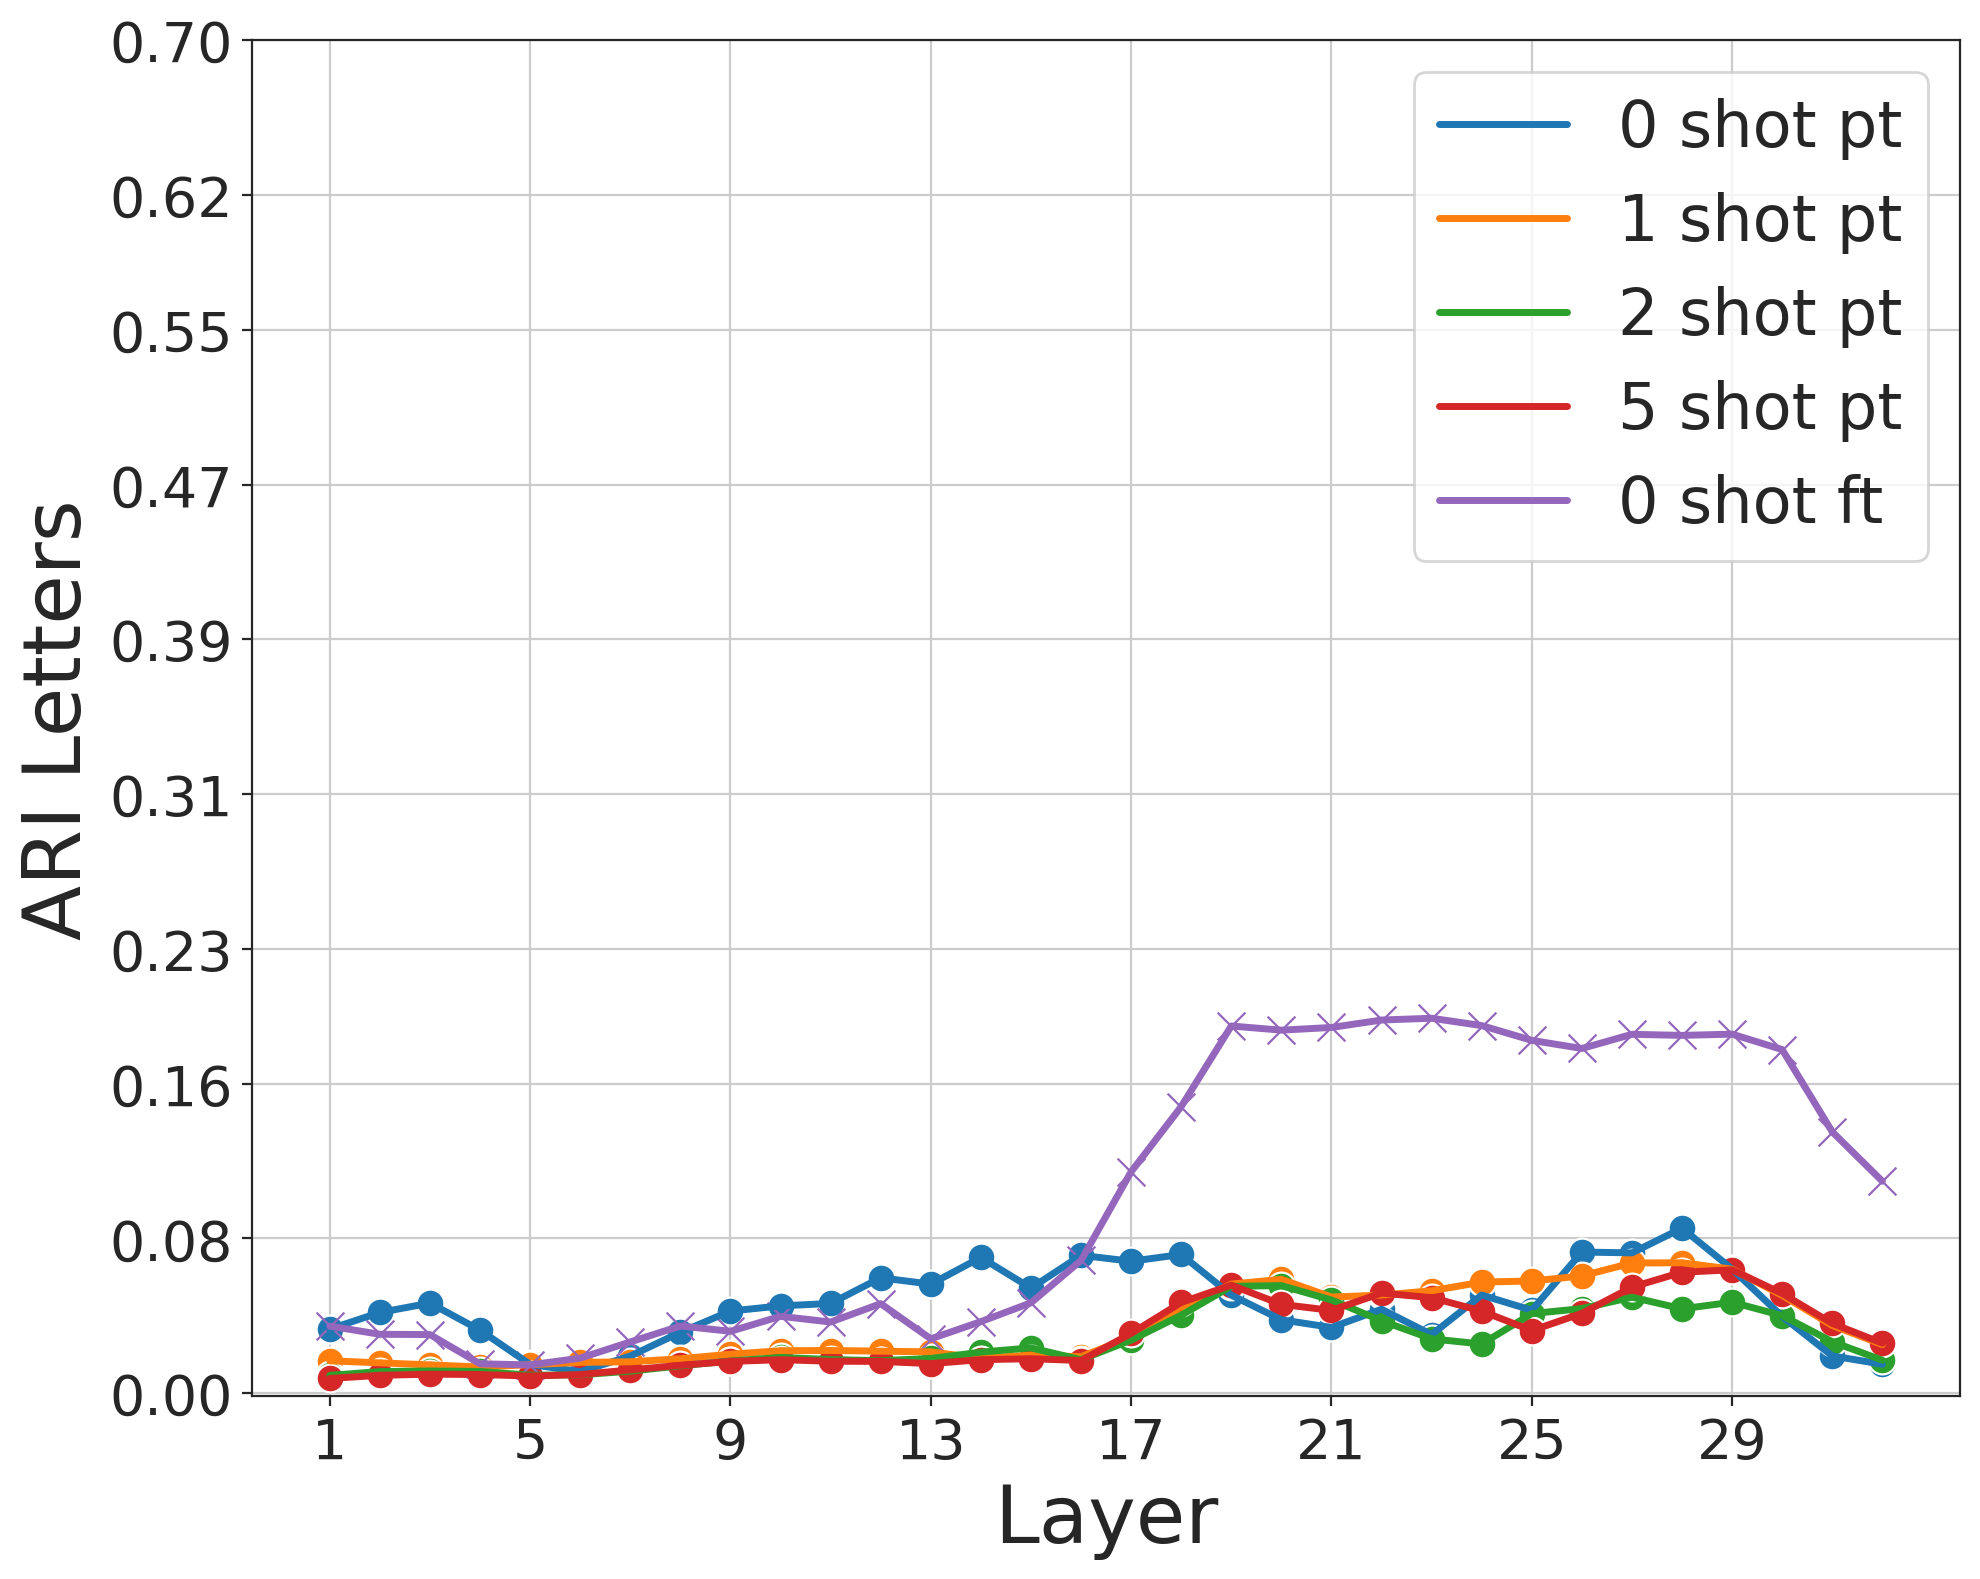

In [38]:
# _PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
#              "/representation_landscape_fs_ft/results/mmlu_pro_race/"
#              "evaluated_test/llama-3-8b")
# shot = [0,1,2,5]
# data_letter = []
# for i in shot:
#     clustering = LabelClustering()
#     out_from_storage = retrieve_from_storage(_PATH / f'{i}shot',
#                                             full_tensor=True)
#     tensors, labels, number_of_layers = out_from_storage
#     data_letter.append(clustering.main(z=1.68,
#                                 tensors=tensors,
#                                 labels=labels["predictions"],
#                                 number_of_layers=number_of_layers))
# _PATH_ft = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
#                 "/representation_landscape_fs_ft/results/mmlu_pro_race"
#                 "/finetuned_dev_val_balanced_20samples/evaluated_test"
#                 "/llama-3-8b/2epochs/epoch_2")
# clustering = LabelClustering()
# out_from_storage = retrieve_from_storage(_PATH_ft,
#                                         full_tensor=True,
#                                         instances_per_sub=200)
# tensors, labels, number_of_layers = out_from_storage
# data_letter.append(clustering.main(z=1.68,
#                             tensors=tensors,
#                             labels=labels["predictions"],
#                             number_of_layers=number_of_layers))

ari = [np.array(i['adjusted_rand_score']) for i in data_letter]
plotter("letter", ari, None, "ARI Letters", 0.78, 2)


### Clusters Analysis

#### Number of clusters

For the following analysis we need to identify core points for each cluster, so we recompute the clustering with `halo==True`

100%|██████████| 32/32 [02:02<00:00,  3.84s/it]


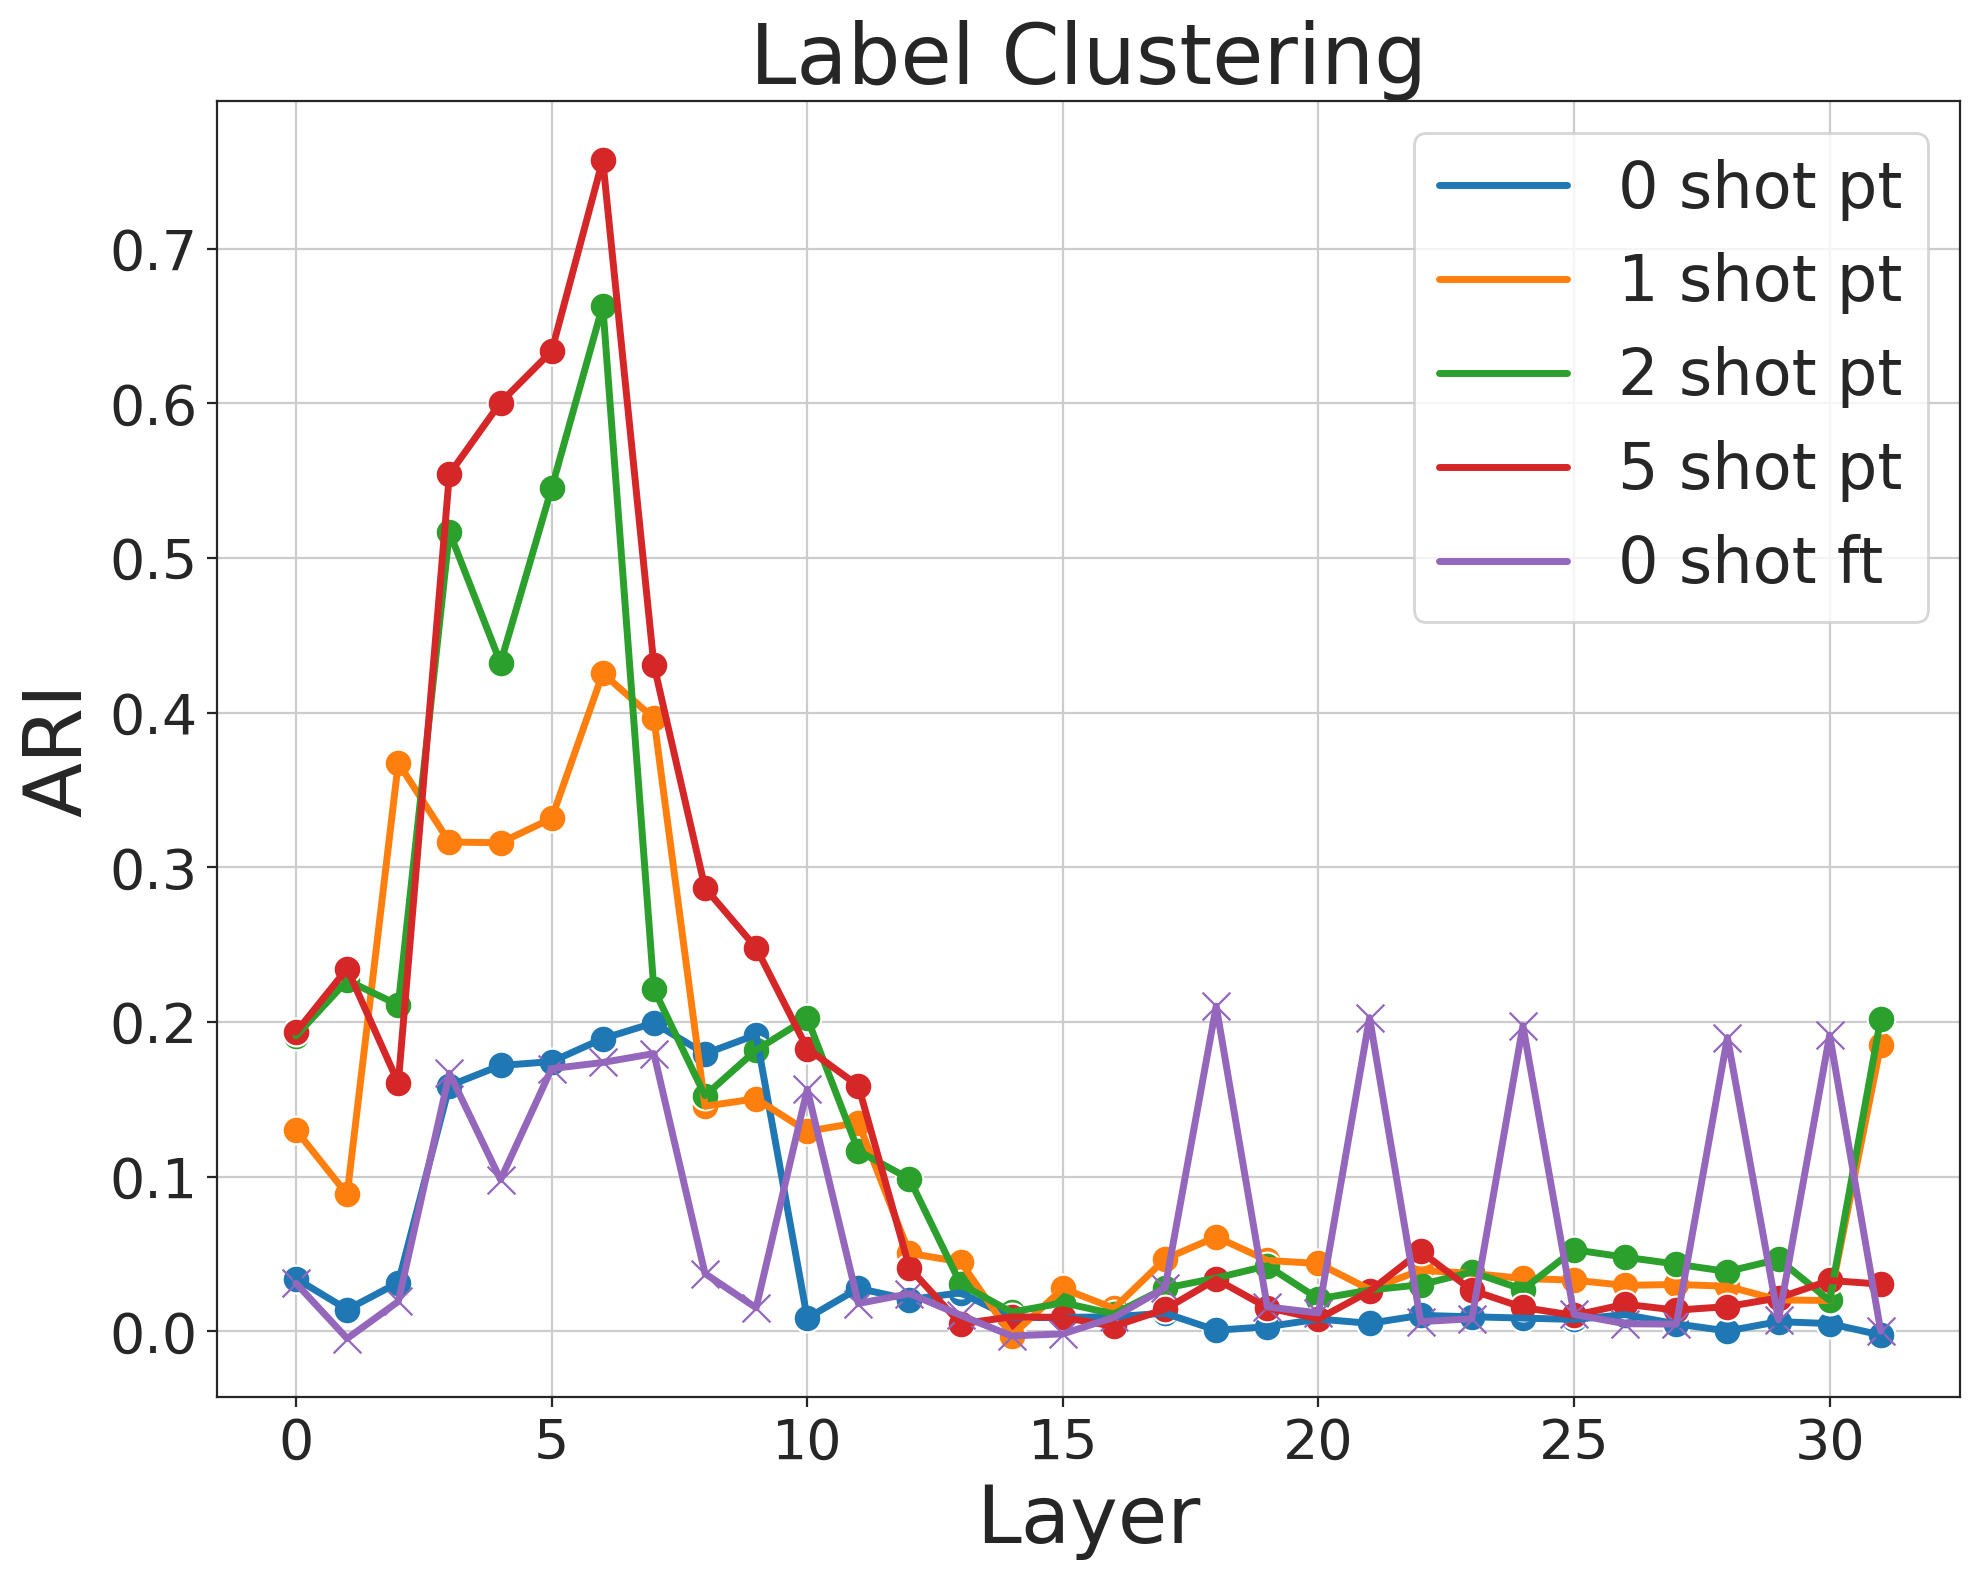

In [15]:

_PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
             "/representation_landscape_fs_ft/results/mmlu_pro_race/"
             "evaluated_test/llama-3-8b")
shot = [0,1,2,5]
data_subjects = []
for i in shot:
    clustering = LabelClustering()
    out_from_storage = retrieve_from_storage(_PATH / f'{i}shot',
                                            full_tensor=True)
    tensors, labels, number_of_layers = out_from_storage
    data_subjects.append(clustering.main(z=1.68,
                                tensors=tensors,
                                labels=labels["subjects"],
                                halo=True,
                                number_of_layers=number_of_layers,
                                parallel=False))
_PATH_ft = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
                "/representation_landscape_fs_ft/results/mmlu_pro_race"
                "/finetuned_dev_val_balanced_20samples/evaluated_test"
                "/llama-3-8b/2epochs/epoch_2")
clustering = LabelClustering()
out_from_storage = retrieve_from_storage(_PATH_ft,
                                        full_tensor=True)
tensors, labels, number_of_layers = out_from_storage
data_subjects.append(clustering.main(z=1.68,
                            tensors=tensors,
                            labels=labels["subjects"],
                            halo=True,      
                            number_of_layers=number_of_layers,
                            parallel=False))

ari = [np.array(i['adjusted_rand_score']) for i in data_subjects]
plotter(ari, "Label Clustering", "ARI")


In [16]:
label_clustering = LabelClustering()
metrics_subject = label_clustering.compute_additional_metrics(data_subjects)

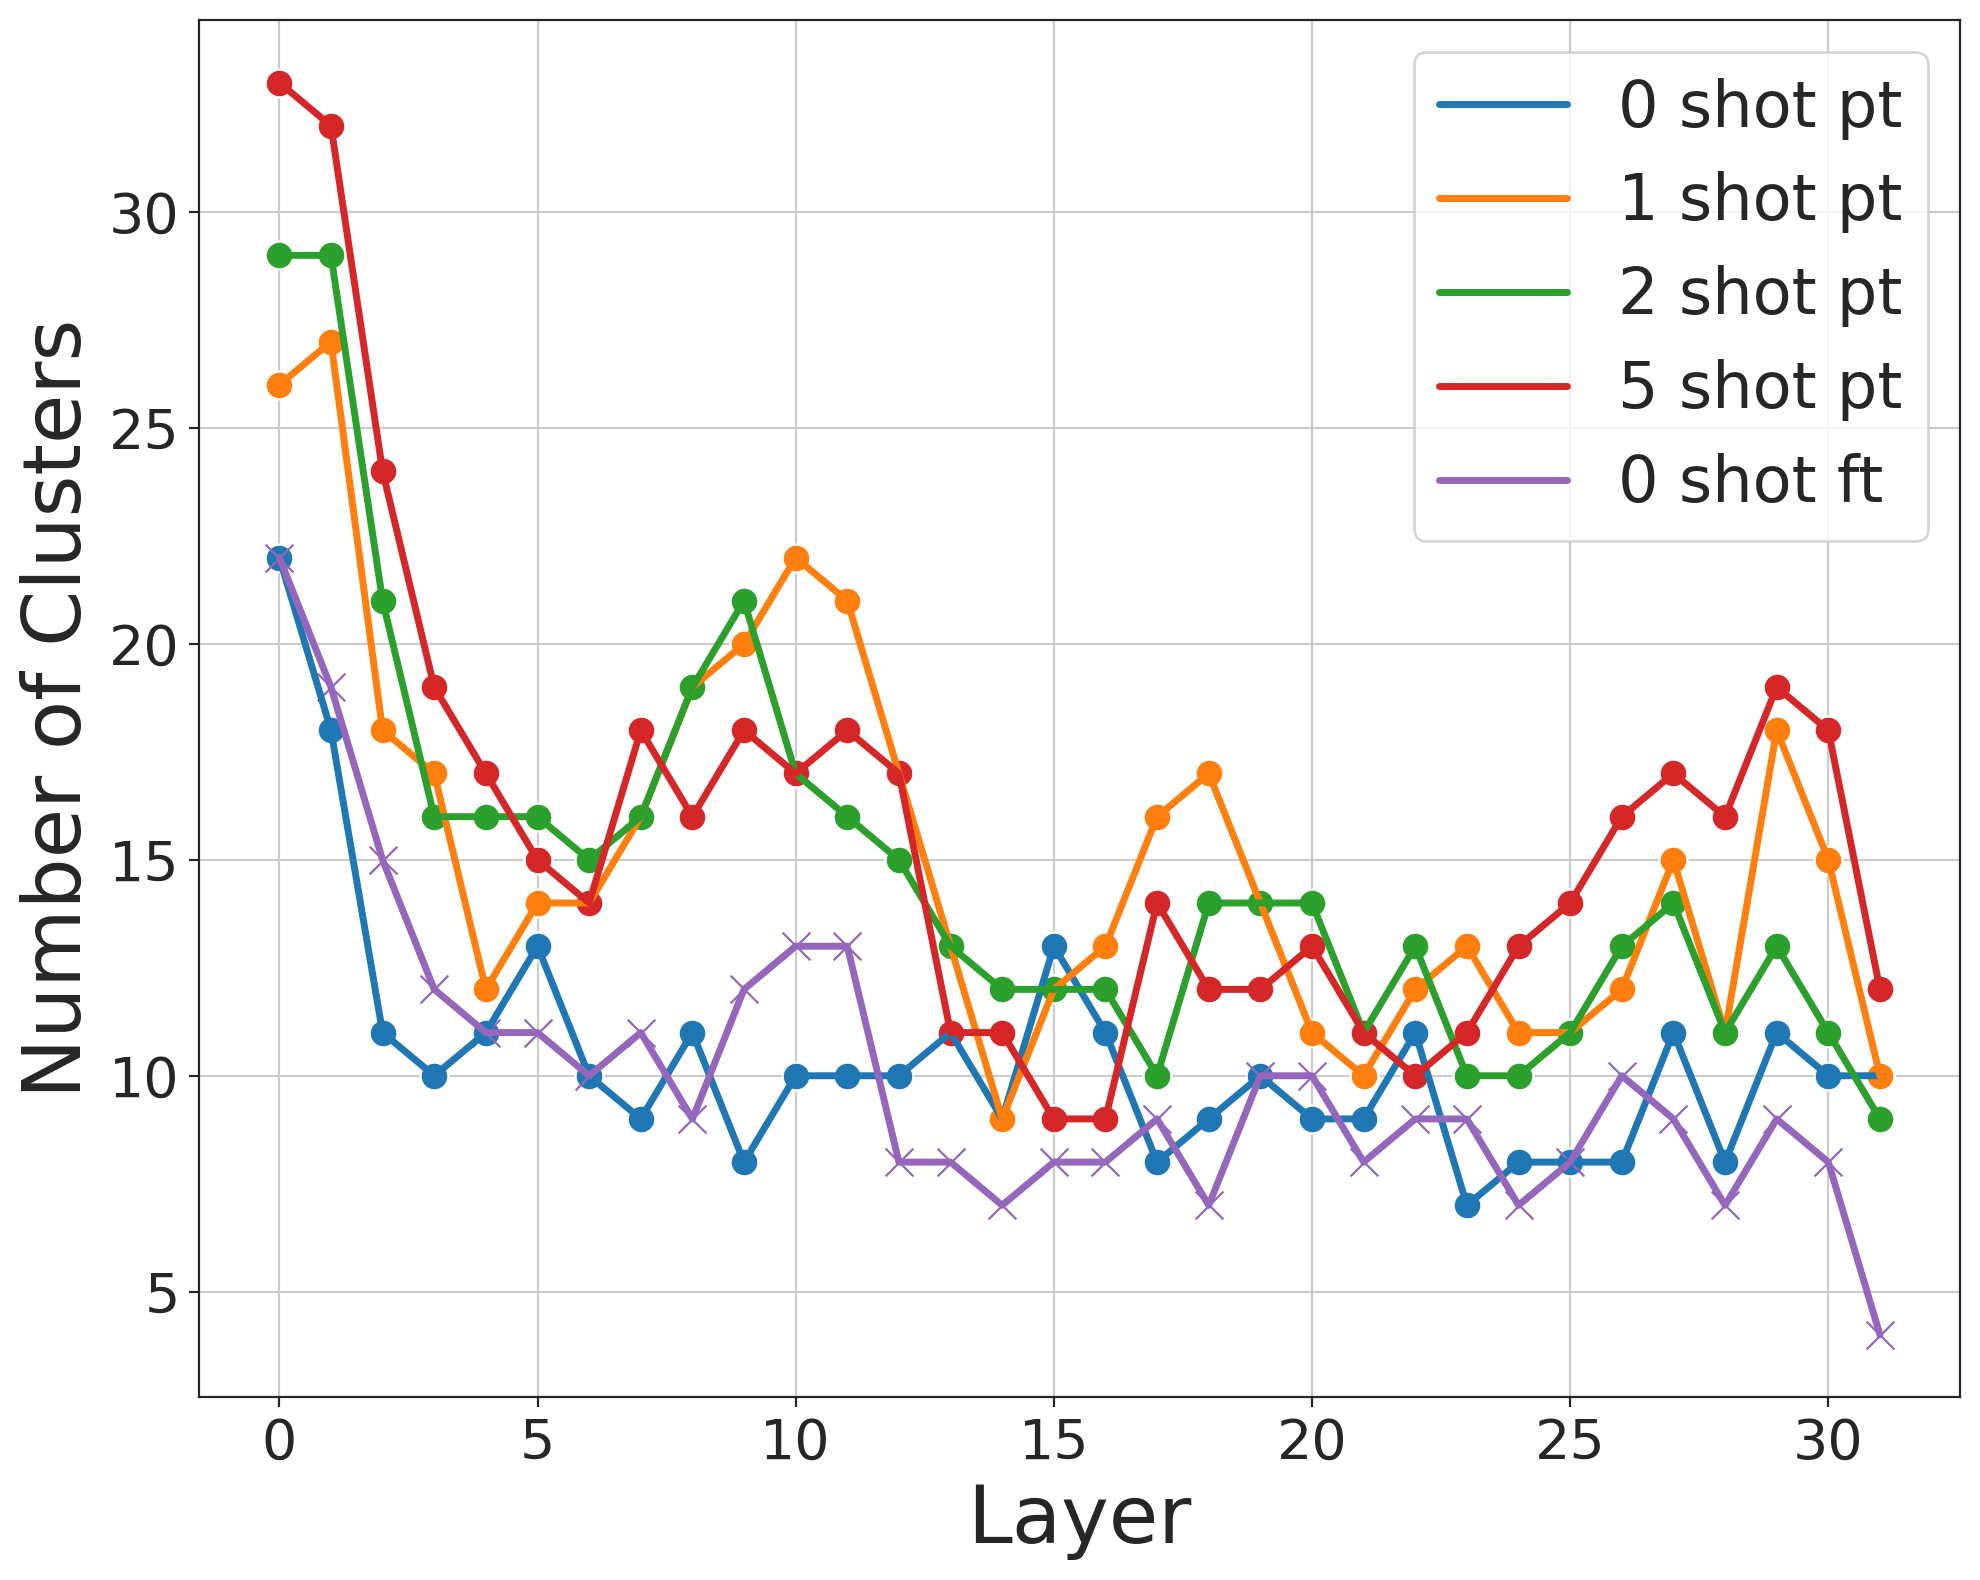

In [33]:
num_clusters = metrics_subject["num_clusters"].to_list()
plotter("num_clusters", num_clusters, None, "Number of Clusters")

#### Core points

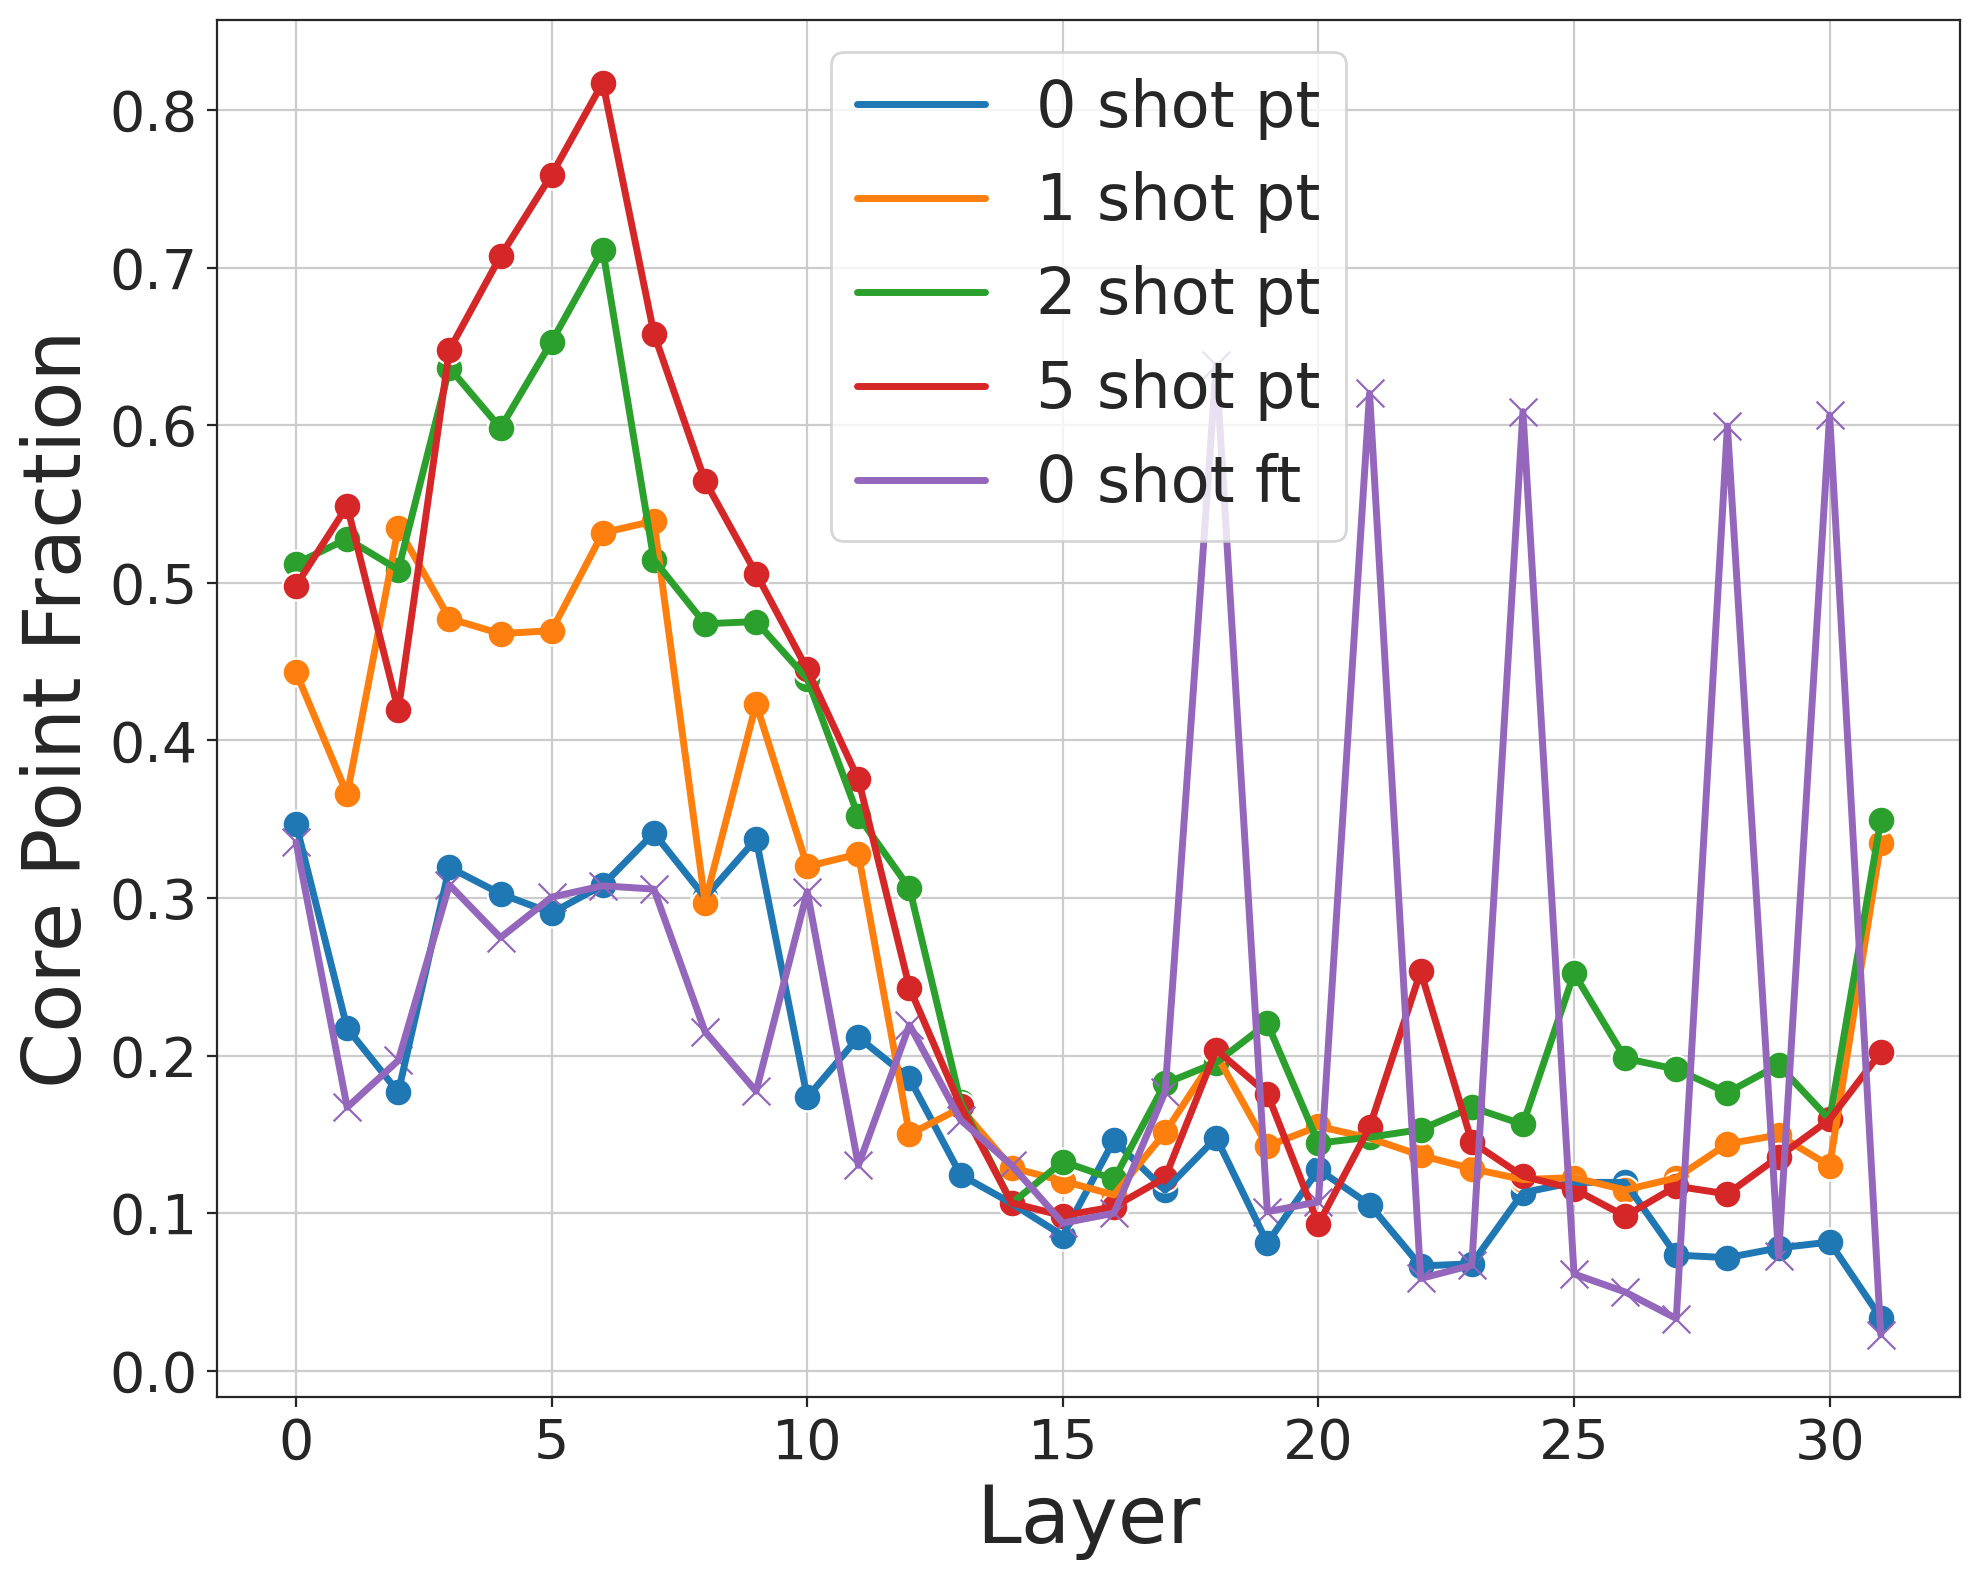

In [35]:
num_clusters = metrics_subject["num_assigned_points"].to_list()
plotter("core_point_fract",num_clusters, None, "Core Point Fraction")

## Probe

In [ ]:
_PATH = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"\
        "/repo/results/evaluated_test/random_order/llama-3-8b")

shot = [0,1,2,4]
data_preds = []
for i in shot:
    linear_probe = LinearProbe(path= _PATH / f'{i}shot')
    data_preds.append(linear_probe.main(label="predictions",
                                instance_per_sub=200))
    

_PATH_ft = Path("/orfeo/cephfs/scratch/area/ddoimo/open/geometric_lens"
                "/repo/results/finetuned_dev_val_balanced_20samples/evaluated_test"
                "/llama-3-8b/4epochs/epoch_4/")

linear_probe = LinearProbe(path= _PATH_ft)
data_preds.append(linear_probe.main(label="predictions",
                            instance_per_sub=200))
ari = [np.array(i['adjusted_rand_score']) for i in data_preds]
plotter(ari, "Label Clustering", "ARI")


Processing layers:  25%|██▌       | 8/32 [00:17<00:01, 14.72it/s]/u/dssc/zenocosini/helm_suite/representation_landscape_fs_ft/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/u/dssc/zenocosini/helm_suite/representation_landscape_fs_ft/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocess

KeyboardInterrupt: 